In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import warnings
warnings.filterwarnings('ignore')

def energy_df():
    energy = pd.read_excel('energy_ind.xls')
    energy = energy.iloc[17:244,2:] # Skip header and footer. Skip first two columns.

    new_columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    # Energy supply in pentajoules, energy supply per capita in gigajoules
    energy.columns = new_columns # Rename columns

    energy = energy.replace('\.+',np.NaN,regex=True) # Replace '...' with NaN.
    energy['Country'] = energy['Country'].replace({"Republic of Korea": "South Korea",
                    "United States of America": "United States",
                    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                    "China, Hong Kong Special Administrative Region": "Hong Kong"}, regex=True)
    energy['Country'] = energy['Country'].replace({' \([\w\s]+\)':'','[\d]+':''},regex= True)
                                                   # Remove numbers and parentheses from country names.
    energy['Energy Supply'] = energy['Energy Supply'].apply(lambda x: x*1E6) #Transform energy supply from penta to giga.
    return energy
########################################################################################################################
def GDP_df():
    GDP = pd.read_csv('world_bank.csv')
    GDP.columns = GDP.iloc[3]
    GDP = GDP[4:] # Remove header
    GDP.rename(columns={'Country Name':'Country'}, inplace=True)
    GDP['Country'] = GDP['Country'].replace({"Korea, Rep.": "South Korea", 
                     "Iran, Islamic Rep.": "Iran",
                     "Hong Kong SAR, China": "Hong Kong"})
    GDP = GDP.iloc[:,[0]+list(-np.arange(10,0,-1))] # Only keep country name and last 10 years of data
    return GDP
########################################################################################################################
def ScimEn_df():
    ScimEn = pd.read_excel('research.xls')
    return ScimEn
########################################################################################################################
def energy_table(first_15=True,join='inner'):
    energy,GDP,ScimEn = energy_df(),GDP_df(),ScimEn_df()
    df = pd.merge(pd.merge(ScimEn,energy,on='Country',how=join),GDP,on='Country',how=join).set_index('Country')
    if first_15 == True:
        n = 15
    elif first_15 == False:
        n = df.shape[0]
    df = df.iloc[:n]
    df.columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    return df 
energy_table()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [2]:
# Top 15 countries for average GDP over the last 10 years
df = energy_table()
df = df.iloc[:,10:]
df['avgGDP'] = df.mean(axis=1)
df = df.sort_values(by=['avgGDP'],ascending=False)
df['avgGDP']

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [3]:
# GDP change over the 10 year span for the country with the largest average GDP
df = energy_table()
df = df.iloc[:,10:]
df['avgGDP'] = df.mean(axis=1)
country = df.sort_values(by=['avgGDP'],ascending=False).iloc[0]
delta_gdp = country['2015']-country['2006']
delta_gdp

1756269486500.0

In [4]:
# Mean energy supply per capita
df = energy_table()
df['Energy Supply per Capita'].mean()

157.6

In [5]:
# Country with the maximum % Renewable
df = energy_table()
max_renewable = df.sort_values(by=['% Renewable'],ascending=False).iloc[0]
country_percentage = (max_renewable.name,max_renewable['% Renewable'])
country_percentage

('Brazil', 69.64803)

In [6]:
# Ratio of self-citations to total citations
df = energy_table()
df['Ratio (citations)'] = df['Self-citations']/df['Citations']
# Country with highest ratio
max_citations = df.sort_values(by='Ratio (citations)',ascending=False).iloc[0]
country_ratio = (max_citations.name,max_citations['Ratio (citations)'])
country_ratio

('China', 0.6893126179389422)

In [7]:
# Estimation of population using Energy Supply and Energy Supply per capita
df = energy_table()
df['Population size'] = df['Energy Supply']/df['Energy Supply per Capita']
df = df.sort_values(by='Population size',ascending=False)
# Most populous countries by descending order
countries = [df.iloc[i].name for i in range(10)]
countries

['China',
 'India',
 'United States',
 'Brazil',
 'Russian Federation',
 'Japan',
 'Germany',
 'Iran',
 'United Kingdom',
 'France']

In [8]:
import scipy.stats as stats
df = energy_table()
df['Population size'] = df['Energy Supply']/df['Energy Supply per Capita']
df = df.sort_values(by='Population size',ascending=False)
# Number of citable documents per person
df['Citable documents per capita'] = df['Citable documents']/df['Population size']
# Correlation between the number of citable documents per capita and the energy supply per capita
corr, pval=stats.pearsonr(df['Citable documents per capita'],df['Energy Supply per Capita'])
corr

0.7940010435442943

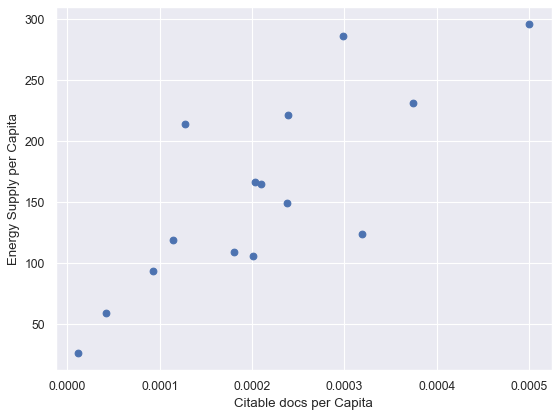

In [9]:
%matplotlib inline

Top15 = energy_table()
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
plt.figure(figsize=(8,6),dpi=80)
plt.scatter(Top15['Citable docs per Capita'], Top15['Energy Supply per Capita'])
plt.xlabel('Citable docs per Capita')
plt.ylabel('Energy Supply per Capita')
plt.show()

In [10]:
# Boolean column that indicates if the country's % Renewable value is at or above the median for all countries in the top 15, 
# or if the country's % Renewable value is below the median
df = energy_table()
median_renewable = df['% Renewable'].median()
above_median = [1 if (df['% Renewable'].loc[x]>=median_renewable) else 0 for x in df.index]
df['HighRenew'] = above_median
df['HighRenew']

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [11]:
# Grouping the countries by continent
ContinentDict  = {'China':'Asia', 
                'United States':'North America', 
                'Japan':'Asia', 
                'United Kingdom':'Europe', 
                'Russian Federation':'Europe', 
                'Canada':'North America', 
                'Germany':'Europe', 
                'India':'Asia',
                'France':'Europe', 
                'South Korea':'Asia', 
                'Italy':'Europe', 
                'Spain':'Europe', 
                'Iran':'Asia',
                'Australia':'Australia', 
                'Brazil':'South America'}
# DataFrame that displays the sample size, and the sum, mean, and std deviation for the estimated population of each country
df = energy_table()
df['Population size'] = df['Energy Supply']/df['Energy Supply per Capita']
new_df = df['Population size'].groupby(ContinentDict).agg(['size', 'sum', 'mean', 'std'])
new_df

,size,sum,mean,std
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [12]:
ContinentDict  = {'China':'Asia', 
                    'United States':'North America', 
                    'Japan':'Asia', 
                    'United Kingdom':'Europe', 
                    'Russian Federation':'Europe', 
                    'Canada':'North America', 
                    'Germany':'Europe', 
                    'India':'Asia',
                    'France':'Europe', 
                    'South Korea':'Asia', 
                    'Italy':'Europe', 
                    'Spain':'Europe', 
                    'Iran':'Asia',
                    'Australia':'Australia', 
                    'Brazil':'South America'}
Top15 = energy_table()
# Cutting % Renewable into 5 bins
renewable_bins=pd.cut(Top15['% Renewable'],bins=5)
# Grouping Top15 by the Continent, as well as these new % Renewable bins
renew_continent = Top15.groupby([ContinentDict,renewable_bins]).agg('size')
renew_continent.index.set_names(['Continent','% Renewable'],inplace=True)
renew_continent[renew_continent!=0]

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [13]:
df = energy_table()
df['PopEst'] = (df['Energy Supply']/df['Energy Supply per Capita'])
df['PopEst'] = ["{0:,}".format(population) for population in df['PopEst']]
# Converting the Population Estimate series to a string with thousands separator (using commas).
df['PopEst']

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

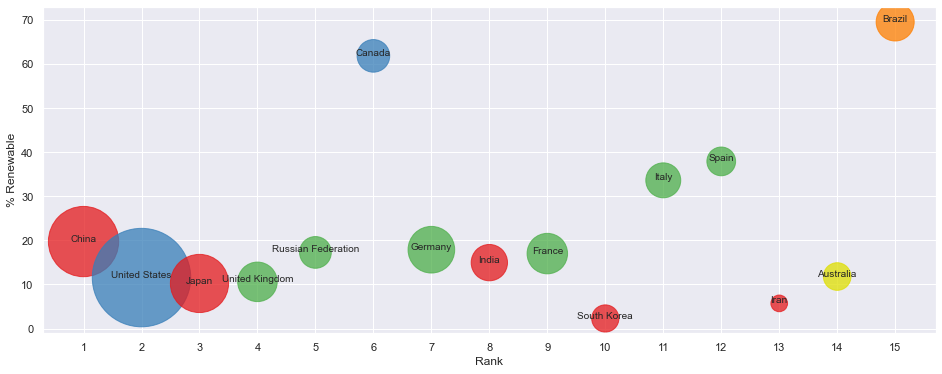

In [14]:
# Bubble chart showing % Renewable vs. Rank.
# The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent
def plot_bubbles():
    import matplotlib as plt
    %matplotlib inline
    Top15 = energy_table()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

plot_bubbles()